In [7]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd


df = pd.read_csv("D:/VisualStudio/python/AI_lab_Conference_Model/Train_Data/DASS.csv")  # Use the actual path
print(df.head())

   Q1_1  Q1_2  Q1_3  Q1_4  Q1_5  Q1_6  Q3_1_S1  Q3_2_S2  Q3_3_S3  Q3_4_S4  \
0    21     2     0     4     4     1        3        3        3        3   
1    18     2     0     4     4     1        3        3        3        3   
2    40     2     1     2     1     1        3        3        1        2   
3    24     1     0     4     2     0        3        3        1        2   
4    50     1     1     2     2     0        3        3        3        2   

   ...  Anxiety_Level  Q3_15_D1  Q3_16_D2  Q3_17_D3  Q3_18_D4  Q3_19_D5  \
0  ...              3         0         3         3         2         3   
1  ...              2         0         2         3         0         0   
2  ...              5         2         1         1         2         2   
3  ...              5         2         1         1         2         2   
4  ...              2         1         0         0         1         2   

   Q3_20_D6  Q3_21_D7  Depression_Score  Depression_Level  
0         3         3     

In [10]:
import pandas as pd
df = pd.read_csv("D:/VisualStudio/python/AI_lab_Conference_Model/Train_Data/DASS.csv")
df.head()


,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q3_1_S1,Q3_2_S2,Q3_3_S3,Q3_4_S4,...,Anxiety_Level,Q3_15_D1,Q3_16_D2,Q3_17_D3,Q3_18_D4,Q3_19_D5,Q3_20_D6,Q3_21_D7,Depression_Score,Depression_Level
0,21,2,0,4,4,1,3,3,3,3,...,3,0,3,3,2,3,3,3,17,5
1,18,2,0,4,4,1,3,3,3,3,...,2,0,2,3,0,0,2,0,7,3
2,40,2,1,2,1,1,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
3,24,1,0,4,2,0,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
4,50,1,1,2,2,0,3,3,3,2,...,2,1,0,0,1,2,0,0,4,1


Classification Report:

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       151
           2       0.94      0.94      0.94        83
           3       0.88      0.92      0.90        91
           4       0.90      0.79      0.84        33
           5       1.00      1.00      1.00         5

    accuracy                           0.94       363
   macro avg       0.94      0.93      0.94       363
weighted avg       0.95      0.94      0.94       363



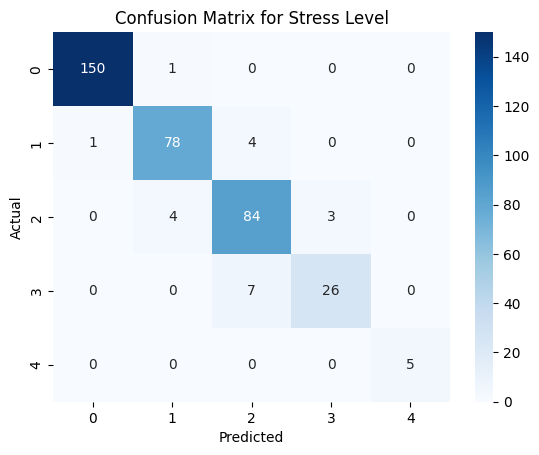

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("D:/VisualStudio/python/AI_lab_Conference_Model/Train_Data/DASS.csv")
df.head()

# Features and target
stress_features = ['Q3_1_S1','Q3_2_S2','Q3_3_S3','Q3_4_S4','Q3_5_S5','Q3_6_S6','Q3_7_S7']
X = df[stress_features]
y = df['Stress_Level']  # Change to 'Anxiety_Level' or 'Depression_Level' if needed

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for Stress Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       151
           2       1.00      0.99      0.99        83
           3       0.98      1.00      0.99        91
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00         5

    accuracy                           0.99       363
   macro avg       1.00      0.99      0.99       363
weighted avg       0.99      0.99      0.99       363



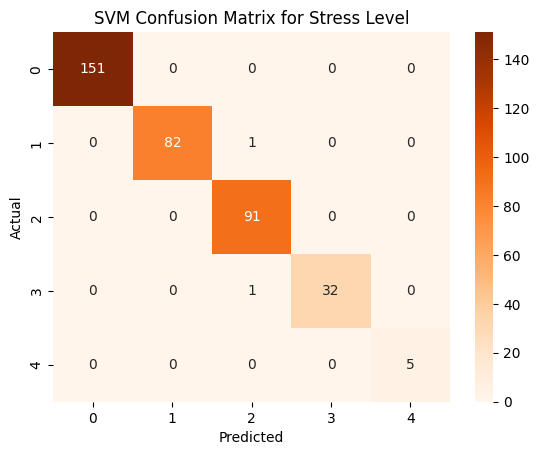

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")
df.head()

# Define features and target for Stress
stress_features = ['Q3_1_S1','Q3_2_S2','Q3_3_S3','Q3_4_S4','Q3_5_S5','Q3_6_S6','Q3_7_S7']
X = df[stress_features]
y = df['Stress_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt='g')
plt.title("SVM Confusion Matrix for Stress Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       142
           2       1.00      0.99      0.99        77
           3       0.97      0.98      0.98        65
           4       0.96      0.96      0.96        54
           5       0.96      0.96      0.96        25

    accuracy                           0.99       363
   macro avg       0.98      0.98      0.98       363
weighted avg       0.99      0.99      0.99       363



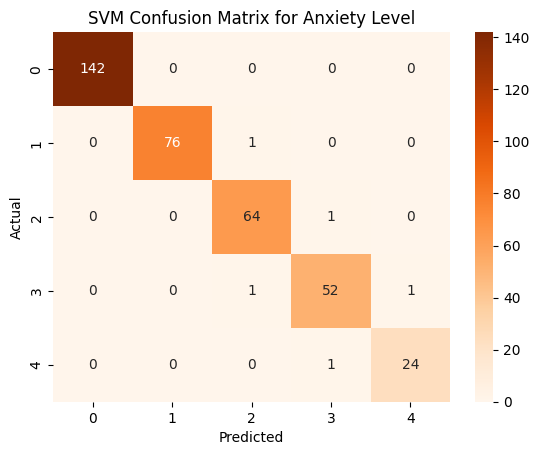

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")
df.head()

# Define features and target for Anxiety
anxiety_features = ['Q3_8_A1','Q3_9_A2','Q3_10_A3','Q3_11_A4','Q3_12_A5','Q3_13_A6','Q3_14_A7']
X = df[anxiety_features]
y = df['Anxiety_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt='g')
plt.title("SVM Confusion Matrix for Anxiety Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       142
           2       0.92      0.95      0.94        77
           3       0.90      0.88      0.89        65
           4       0.91      0.89      0.90        54
           5       1.00      0.88      0.94        25

    accuracy                           0.94       363
   macro avg       0.94      0.92      0.93       363
weighted avg       0.94      0.94      0.94       363



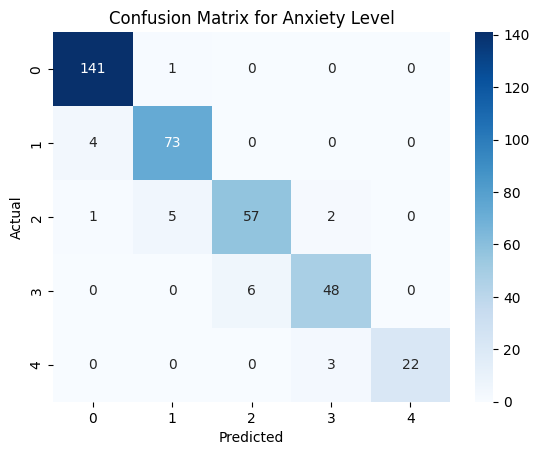

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")
df.head()

# Features and target
anxiety_features = ['Q3_8_A1','Q3_9_A2','Q3_10_A3','Q3_11_A4','Q3_12_A5','Q3_13_A6','Q3_14_A7']
X = df[anxiety_features]
y = df['Anxiety_Level']  # Change to 'Stress_Level' or 'Depression_Level' if needed

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for Anxiety Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Classification Report:

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       132
           2       0.89      0.86      0.88        66
           3       0.93      0.93      0.93        73
           4       0.91      0.88      0.89        58
           5       0.88      0.85      0.87        34

    accuracy                           0.92       363
   macro avg       0.91      0.90      0.91       363
weighted avg       0.92      0.92      0.92       363



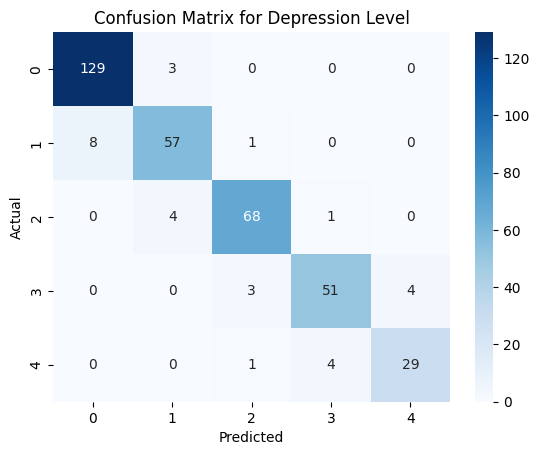

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")
df.head()

# Features and target
depression_features = ['Q3_15_D1','Q3_16_D2','Q3_17_D3','Q3_18_D4','Q3_19_D5','Q3_20_D6','Q3_21_D7']
X = df[depression_features]
y = df['Depression_Level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for Depression Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       132
           2       1.00      0.98      0.99        66
           3       0.99      1.00      0.99        73
           4       0.95      0.98      0.97        58
           5       0.97      0.91      0.94        34

    accuracy                           0.99       363
   macro avg       0.98      0.98      0.98       363
weighted avg       0.99      0.99      0.99       363



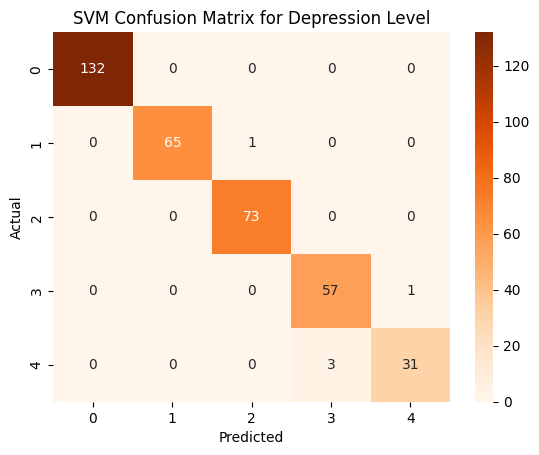

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")
df.head()

# Define features and target for Stress
depression_features = ['Q3_15_D1','Q3_16_D2','Q3_17_D3','Q3_18_D4','Q3_19_D5','Q3_20_D6','Q3_21_D7']
X = df[depression_features]
y = df['Depression_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt='g')
plt.title("SVM Confusion Matrix for Depression Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Stress
stress_features = ['Q3_1_S1','Q3_2_S2','Q3_3_S3','Q3_4_S4','Q3_5_S5','Q3_6_S6','Q3_7_S7']
X = df[stress_features]
y = df['Stress_Level']

# Encode target labels
classes = y.unique()
y_encoded = pd.Categorical(y).codes
y_categorical = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt='g')
plt.title("Neural Network Confusion Matrix for Stress Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



ModuleNotFoundError: No module named 'tensorflow'

d:\VisualStudio\python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00         5

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363



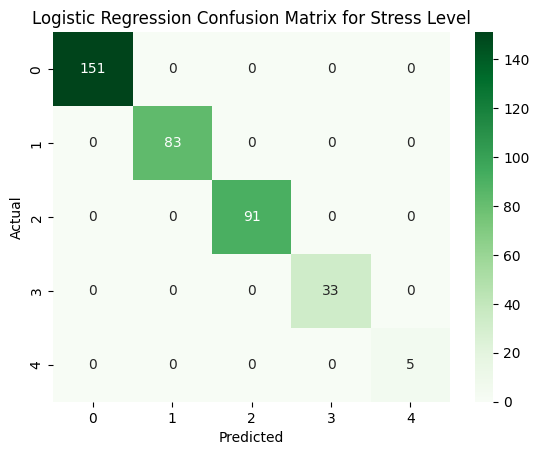

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Stress
stress_features = ['Q3_1_S1','Q3_2_S2','Q3_3_S3','Q3_4_S4','Q3_5_S5','Q3_6_S6','Q3_7_S7']
X = df[stress_features]
y = df['Stress_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='g')
plt.title("Logistic Regression Confusion Matrix for Stress Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Anxiety
anxiety_features = ['Q3_8_A1','Q3_9_A2','Q3_10_A3','Q3_11_A4','Q3_12_A5','Q3_13_A6','Q3_14_A7']
X = df[anxiety_features]
y = df['Anxiety_Level']

# Encode target labels
classes = y.unique()
y_encoded = pd.Categorical(y).codes
y_categorical = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt='g')
plt.title("Neural Network Confusion Matrix for Anxiety Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



ModuleNotFoundError: No module named 'tensorflow'

d:\VisualStudio\python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        25

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363



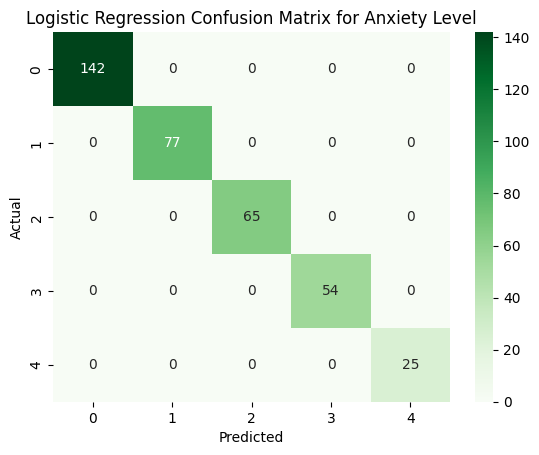

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Anxiety
anxiety_features = ['Q3_8_A1','Q3_9_A2','Q3_10_A3','Q3_11_A4','Q3_12_A5','Q3_13_A6','Q3_14_A7']
X = df[anxiety_features]
y = df['Anxiety_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='g')
plt.title("Logistic Regression Confusion Matrix for Anxiety Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Depression
depression_features = ['Q3_15_D1','Q3_16_D2','Q3_17_D3','Q3_18_D4','Q3_19_D5','Q3_20_D6','Q3_21_D7']
X = df[depression_features]
y = df['Depression_Level']

# Encode target labels
classes = y.unique()
y_encoded = pd.Categorical(y).codes
y_categorical = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt='g')
plt.title("Neural Network Confusion Matrix for Depression Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



ModuleNotFoundError: No module named 'tensorflow'

d:\VisualStudio\python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       132
           2       0.98      0.98      0.98        66
           3       0.99      0.99      0.99        73
           4       0.94      1.00      0.97        58
           5       1.00      0.88      0.94        34

    accuracy                           0.98       363
   macro avg       0.98      0.97      0.98       363
weighted avg       0.98      0.98      0.98       363



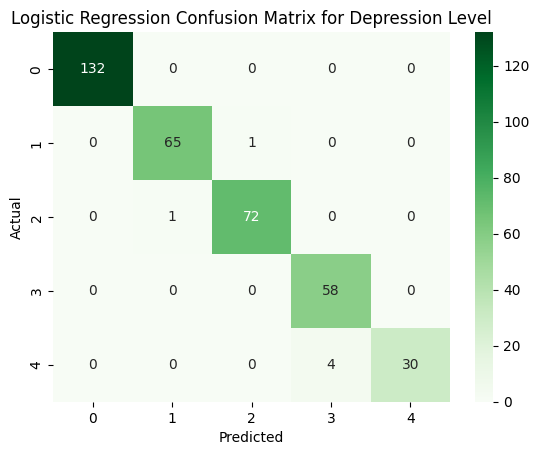

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Train_Data/DASS.csv")

# Define features and target for Depression
depression_features = ['Q3_15_D1','Q3_16_D2','Q3_17_D3','Q3_18_D4','Q3_19_D5','Q3_20_D6','Q3_21_D7']
X = df[depression_features]
y = df['Depression_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='g')
plt.title("Logistic Regression Confusion Matrix for Depression Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
